In [1]:
import time
start_time=time.time()

In [2]:
import sys
from pathlib import Path
import json
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Input path

observations folder location

In [3]:
text_file_0 = open("path-observations.txt", "r")
path_obs = text_file_0.read()

In [4]:
datapath_obs = Path(path_obs).expanduser()

results folder location

In [5]:
text_file_1 = open("path-results.txt", "r")
path_res = text_file_1.read()

In [6]:
datapath_res= Path(path_res).expanduser()

files names

In [7]:
data_file = 'MUSE-N346-H-'

In [8]:
name_export='MUSE-N346-H'

In [9]:
flux_in = data_file + 'sum.fits'
radial_velocity_in = data_file + 'vmean.fits'
sigma_in = data_file + 'sigma.fits'

In [10]:
flux=fits.open(datapath_obs / flux_in)
rad_vel=fits.open(datapath_obs / radial_velocity_in)
sigma=fits.open(datapath_obs / sigma_in)

Input data of the region

In [11]:
dist = 62000 #parsecs
pix = 0.2 #arcsec
seeing = 0.9 #seeing arcsec FWHM

In [12]:
pc = dist*(2*np.pi) / (360 * 60 * 60)
s0 = (seeing*pc)/2.355 #seeing pc RMS
pc,s0

(0.3005844822879123, 0.11487305055589005)

In [13]:
sb = flux["DATA"].data.astype("float")
vv = rad_vel["DATA"].data.astype("float")
ss = sigma["DATA"].data.astype("float")

In [14]:
## Replace spurious values in the arrays
m = ~np.isfinite(sb*vv*ss) | (sb < 0.0)

sb[m] = 0.0
vv[m] = np.nanmean(vv)
ss[m] = 0.0
sb /= sb.max()

good = (~m) & (sb > 0.001)

<ipython-input-14-95afb24455fa>:2: RuntimeWarning: invalid value encountered in less
  m = ~np.isfinite(sb*vv*ss) | (sb < 0.0)


In [15]:
trim = (slice(20, 315), slice(10, 330))

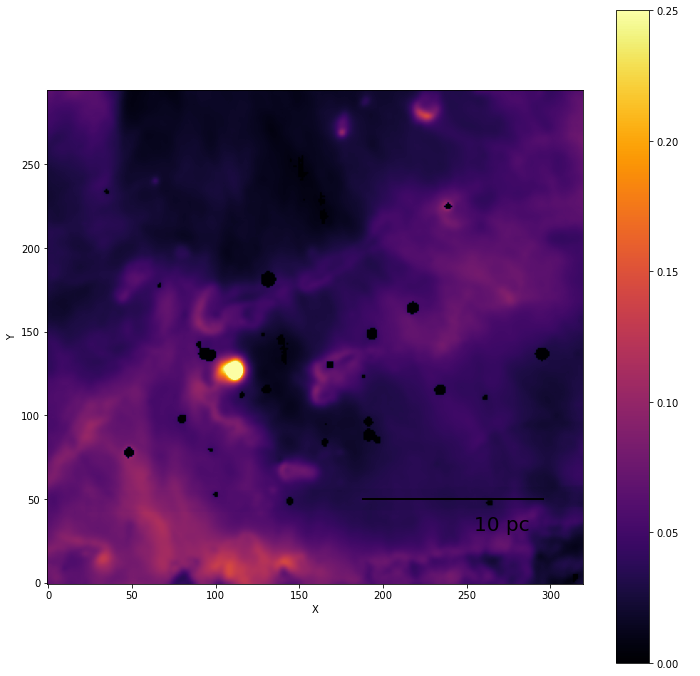

In [16]:
fig, ax = plt.subplots(figsize=(12, 12))


dataI=sb[trim]

plt.figure(1)
plt.imshow(dataI, cmap='inferno')

cbar = plt.colorbar()
plt.clim(0,0.25)
cbar.set_label(' ', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [17]:
dffx=pd.DataFrame(sb[trim])

In [18]:
dffx=dffx.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'I'})

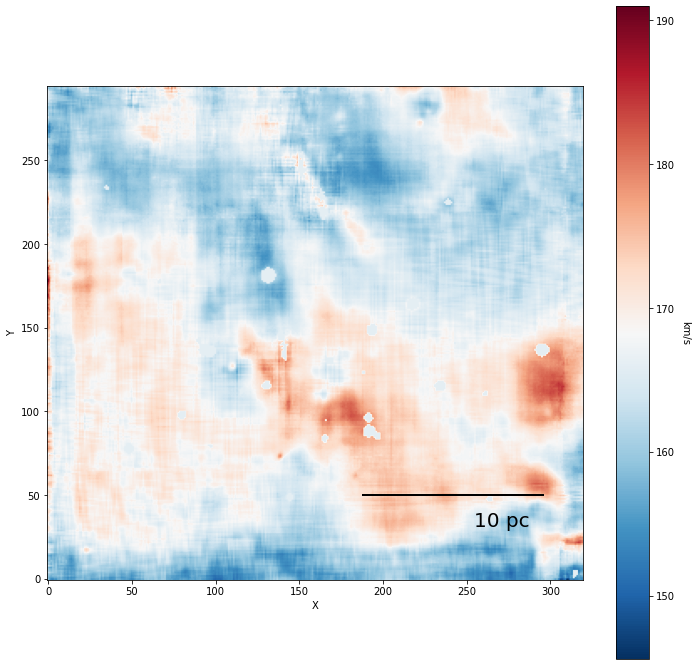

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))


dataRV=vv[trim]

plt.figure(1)
plt.imshow(dataRV, cmap='RdBu_r')

cbar = plt.colorbar()
#plt.clim(225,350)
cbar.set_label('km/s', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [20]:
RV=pd.DataFrame(vv[trim])

In [21]:
RV=RV.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})

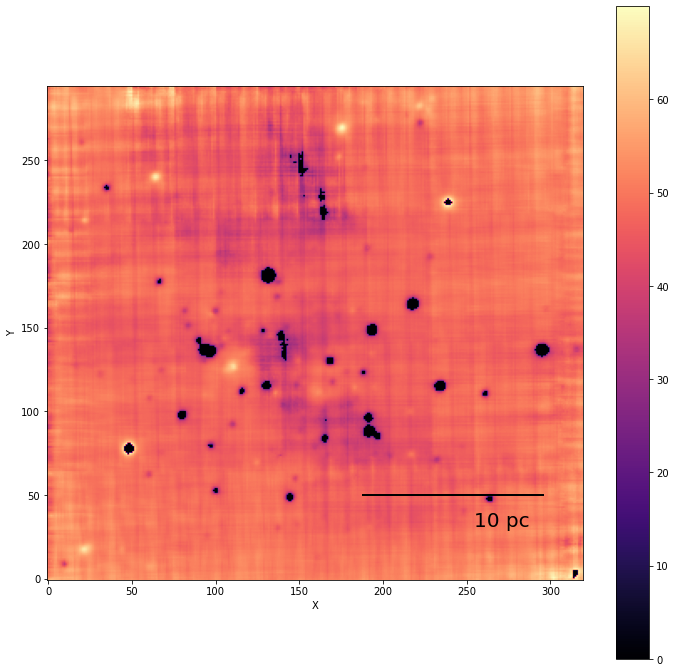

In [22]:
fig, ax = plt.subplots(figsize=(12, 12))


dataS=ss[trim]

plt.figure(1)
plt.imshow(dataS, cmap='magma')

cbar = plt.colorbar()
#plt.clim(225,350)
cbar.set_label(' ', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [23]:
dsig=pd.DataFrame(ss[trim])

In [24]:
dsig=dsig.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'Sig'})

In [25]:
data=RV
data['I']=dffx.I
data['Sig']=dsig.Sig
data.describe()

X             Y            RV             I           Sig
count  94400.000000  94400.000000  94400.000000  94400.000000  94400.000000
mean     147.000000    159.500000    166.141964      0.045544     47.730251
std       85.159126     92.376081      5.034158      0.027559      5.817829
min        0.000000      0.000000    145.606644      0.000000      0.000000
25%       73.000000     79.750000    162.401657      0.027673     46.061980
50%      147.000000    159.500000    166.164078      0.041313     48.202181
75%      221.000000    239.250000    169.669552      0.059947     50.363165
max      294.000000    319.000000    190.943253      1.000000     69.969765

In [26]:
mI=data.I>0

In [27]:
data[mI].describe()

X             Y            RV             I           Sig
count  93661.000000  93661.000000  93661.000000  93661.000000  93661.000000
mean     147.056982    159.452921    166.142188      0.045903     48.106850
std       85.358765     92.562437      5.053979      0.027368      3.999625
min        0.000000      0.000000    145.606644      0.007131     30.000082
25%       73.000000     79.000000    162.369736      0.027986     46.125134
50%      147.000000    160.000000    166.225159      0.041582     48.233334
75%      221.000000    240.000000    169.697830      0.060090     50.381607
max      294.000000    319.000000    190.943253      1.000000     69.969765

Text(0.5, 6.79999999999999, 'Radial velocity [km/s]')

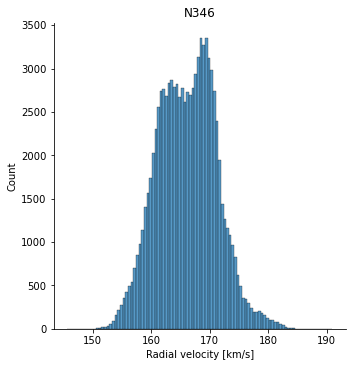

In [28]:
#sns.displot(RV[0]-RV[0].mean(),bins=100)
sns.displot(data[mI].RV,bins=100)

#plt.xlim(200,350)

#plt.text(0.75, 1.15,'n ='+str(RV[0].count()), ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.80, 0.82,'$μ$ ='+str(np.round(RV[0].mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.85, 1.25,'$σ^{2}$ ='+str(np.round(RV[0].var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('N346')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"
plt.xlabel('Radial velocity [km/s]')

In [29]:
data_export_list = {
        'name': name_export, 
        'pc' : pc,
        's0' : s0,
        'pix' : pix,
         name_export : np.array(data[mI]),
      }
data_export_list

{'name': 'MUSE-N346-H',
 'pc': 0.3005844822879123,
 's0': 0.11487305055589005,
 'pix': 0.2,
 'MUSE-N346-H': array([[0.00000000e+00, 0.00000000e+00, 1.60528992e+02, 6.89096987e-02,
         5.69081764e+01],
        [0.00000000e+00, 1.00000000e+00, 1.56430389e+02, 6.92670147e-02,
         5.83227806e+01],
        [0.00000000e+00, 2.00000000e+00, 1.53628311e+02, 7.03174159e-02,
         5.96044540e+01],
        ...,
        [2.94000000e+02, 3.17000000e+02, 1.61263489e+02, 6.10456373e-02,
         5.94872169e+01],
        [2.94000000e+02, 3.18000000e+02, 1.60770996e+02, 6.14648379e-02,
         5.78720055e+01],
        [2.94000000e+02, 3.19000000e+02, 1.60649826e+02, 6.19543243e-02,
         5.84608307e+01]])}

In [30]:
n = None

data_export_matrix = {
       'name': name_export, 
       'pc' : pc,
       's0' : s0,
       'pix' : pix,
       'sb' : flux["DATA"].data.astype("float"),
       'vv' : rad_vel["DATA"].data.astype("float"),
       'ss' : sigma["DATA"].data.astype("float")

      }

data_export_matrix

{'name': 'MUSE-N346-H',
 'pc': 0.3005844822879123,
 's0': 0.11487305055589005,
 'pix': 0.2,
 'sb': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'vv': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'ss': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]])}

In [31]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [32]:
jsonfilename =name_export +"-m.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_matrix, fp=f, indent=3, cls=MyEncoder)

In [33]:
jsonfilename =name_export +"-l.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_list, fp=f, indent=3, cls=MyEncoder)

In [34]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 8.408201932907104 seconds ---


In [35]:
!jupyter nbconvert --to script --no-prompt otv-MUSE-N346-H.ipynb

[NbConvertApp] Converting notebook otv-MUSE-N346-H.ipynb to script
[NbConvertApp] Writing 5215 bytes to otv-MUSE-N346-H.py
